# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 05 апреля 18:00 Сдача **очная** на онлайн занятии. <br\>


Используйте данный Ipython Notebook при оформлении домашнего задания.

Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0920, Задание 2] Фамилия Имя.



**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

$$ w_{new} = w_{old} - {\lambda} \cdot grad(L_{X}(w)), $$
где $$ L_{X}(w) = \frac{1}{n} \sum_{i=1}^X (y_{i} - a_{i}) + \sum_{i=1}^D w_{i}^2= \frac{1}{n}\left( \vec{y}-X\vec{w}\right)^T \left(\vec{y}-X\vec{w}\right) + \frac{1}{C}\vec{w}^T\vec{w}:$$ функция потерь на подмножестве X множества объектов, C: шаг спуска (возможно переменный)
$$grad(L_{x}(w)) = grad\left(\frac{1}{n}\left(\vec{y}^T\vec{y}-2\vec{y}^TX\vec{w}+\vec{w}^T X^TX\vec{w}\right)+ \frac{1}{C}\vec{w}^T\vec{w}\right) = \newline \left(-2X^T\vec{y} + 2X^TX\vec{w} + \frac{2\vec{w}}{C}\right)$$ 
или
$$ w_{new} = w_{old} - \frac{\lambda}{n}\sum_i -2(y_i - w^Tx_i) \cdot x_{i} + \sum_{i=1}^D \frac{2w_{i}}{C} = \newline w_{new} = w_{old} - \frac{\lambda}{n}\sum_i -2(y_i - a(x_{i})) \cdot x_{i} + \sum_{i=1}^D \frac{2w_{i}}{C} $$

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

$ l_{i}(x) = y_{i} \ln\left(\frac{1}{1+e^{-x}}\right) + (1-y_{i})\left(1 - \ln\left(\frac{1}{1+e^{-x}}\right)\right), \newline$
$ \frac{\partial l_{i}}{\partial x}  = y_{i}-\frac{1}{e^{-x}+1}$, 
Тогда $L(w) = \frac{1}{n}\sum_i l_{i}(<w, x_{i}>) + R(w) = \frac{1}{n} \sum_i\left(l_{i}(w^Tx_{i})\right) + R(w)$,
А $$grad(L(w)) = \frac{1}{n}\sum_i \left(y_{i} - \frac{1}{1+e^{-w^Tx_{i}}}\right) \cdot \frac{\partial <w,x_{i}>}{\partial w} + \sum_{i=1}^{D}\frac{2w_i}{C} $$
Итого
$$ w_{new} = w_{old} - \frac{\lambda}{n} \sum_i \left(y_{i} - \frac{1}{1+e^{-w^Tx_{i}}}\right) \cdot x_{i} + \sum_{i=1}^{D}\frac{2w_i}{C}  =\newline w_{old} - \frac{\lambda}{n} \sum_i \left(y_{i} - \sigma(w,x_i)\right) \cdot x_{i} + \sum_{i=1}^{D}\frac{2w_i}{C} = \newline w_{old} - \frac{\lambda}{n} \sum_i \left(y_{i} - a(x_{i})\right) \cdot x_{i} + \sum_{i=1}^{D}\frac{2w_i}{C}$$

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

Гессиан равен
$$ \left|XX^T\right|$$
X полного ранга, значит $\left|X\right| != 0$, $\left|X\right| = \left|X^T\right|$, $\left|XY\right| = \left|X\right|\left|Y\right|$, а значит Гессиан $ = \left|X\right|^2 > 0$
$$\left(-2X^T\vec{y} + 2X^TX\vec{w} + \frac{2\vec{w}}{C}\right) = 0 \newline \left(\left(2XX^T+\frac{2}{C}\right)\vec{w}\right) = 2X^T\vec{y} \newline \vec{w} = \left(XX^T+\frac{1}{C}\cdot I \right)^{-1}X^T\vec{y}$$
Подбор коэфициента C позволяет сделать матрицу невырожденной, позволяя найти точное решение (если матрица $XX^T$ вырождена, то прибавление единичной матрицы сделает ее невырожденной)

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

$$ \frac {\partial E}{\partial a} = \frac{-p(y_{i} = 1|x_{i})}{a(x_{i})} + \frac{p(y_{i} = 0|x_{i})}{1-a(x_{i})}
=\newline  \frac{a(x_{i}) - p(y_{i} = 1|x_{i})}{a(x_{i})(1-a(x_{i}))}$$

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

$w_{0}$ позволяет сдвинуть разделяющую гиперплоскость в точке 0

#  Реализация линейной модели (4 балла)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [2]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [3]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [4]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [5]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [6]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    index = np.random.choice(X.shape[0], batch_size, replace = False)
    X_batch = X[index]
    y_batch = y[index]
    #print(index.shape)
    for i in range(X.shape[0] // batch_size):
        indeces = np.random.choice(X.shape[0], batch_size, replace = False)
        #print(indeces.shape)
        X_batch = X[indeces]
        y_batch = y[indeces]
        yield (X_batch, y_batch)

# Теперь можно сделать генератор по данным ()
#  my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1):

In [7]:
#%%pycodestyle
def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    
    sigm_value_x = 1 / (1 + np.exp(-x))
    return sigm_value_x

from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self,batch_generator, batch_size, C=1, alpha=0.01, max_epoch=10, 
                 model_type='lin_reg', lower = 0.5):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """
        self.batch_size = batch_size
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter' : [], 'loss' : []}  
        self.model_type = model_type
        self.lower = lower
    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        if(self.model_type == 'lin_reg'):
            loss = mean_squared_error(y_batch, np.dot(X_batch, self.weights))
            loss += 1/self.C * np.sum(self.weights**2)
        if(self.model_type == 'log_reg'):
            loss = np.sum(y_batch * np.log(sigmoid(np.dot(X_batch,self.weights))) +
                            (1-y_batch)*(1-np.log(sigmoid(np.dot(X_batch, self.weights)))))
            loss /= y_batch.shape[0]
            loss += 1/self.C * np.sum(self.weights**2)
        return loss
    
    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        if(self.model_type == 'lin_reg'):
            loss_grad = 2 * X_batch.T @ (X_batch @ self.weights - y_batch)
            loss_grad /= X_batch.shape[0]
            loss_grad += 2 / self.C * self.weights
        if(self.model_type == 'log_reg'):
            loss_grad = np.dot(X_batch.T, sigmoid(np.dot(X_batch, self.weights)) - y_batch)
            loss_grad /= X_batch.shape[0]
            loss_grad += 2 /self.C * self.weights
        return loss_grad
    
    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights -= self.alpha * new_grad
    
    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        
        # Нужно инициализровать случайно веса
        self.weights = np.random.sample(X.shape[1] + 1)
        for n in range(0, self.max_epoch):
            new_epoch_generator = batch_generator(X,y,True, self.batch_size)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                y_batch = new_batch[1]
                temp = np.ones(y_batch.shape[0]).reshape(-1, 1)
                X_batch = np.append(temp, new_batch[0], axis=1)
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                self.update_weights(batch_grad)
                batch_loss = self.calc_loss(X_batch, y_batch)
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
                
        return self
        
    def predict(self, X, lower = 0.5):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        temp = np.ones(X.shape[0]).reshape(-1, 1)
        X = np.append(temp, X, axis=1)
        if(self.model_type == 'lin_reg'):
            y_hat = np.dot(X, self.weights)
        if(self.model_type == 'log_reg'):
            y_hat = sigmoid(np.dot(X, self.weights))
        # Желательно здесь использовать матричные операции между X и весами, например, numpy.dot 
        return np.where(y_hat >= self.lower, 1, 0)

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [8]:
def plot_decision_boundary(clf):
    return clf.weights[:2:]

0.88

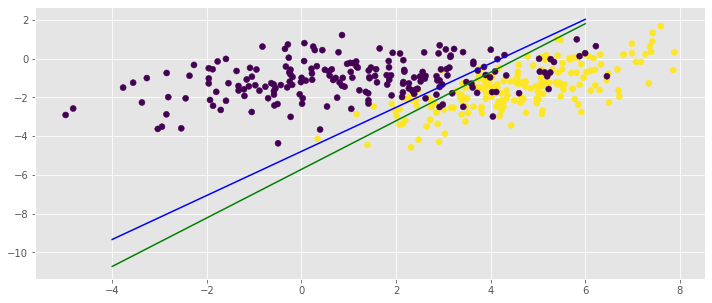

In [10]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

clflin = MySGDClassifier(batch_generator = batch_generator,batch_size = 1, C = 1, 
                      alpha = 0.004, max_epoch = 20, model_type = 'lin_reg')
clflin.fit(X, y)
x = np.linspace(-4,6,100)
plt.scatter(X[:,0], X[:,1], c=y)
plt.plot(x, (0.5-clflin.weights[1]*x - clflin.weights[0])/clflin.weights[2], 'b')
clflog = MySGDClassifier(batch_generator = batch_generator,batch_size = 1, C = 100, 
                      alpha = 0.01, max_epoch = 20, model_type = 'log_reg')
clflog.fit(X, y)
plt.plot(x, (0.5-clflog.weights[1]*x - clflog.weights[0])/clflog.weights[2], 'g')

### Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [11]:
from sklearn.datasets import make_classification

In [12]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

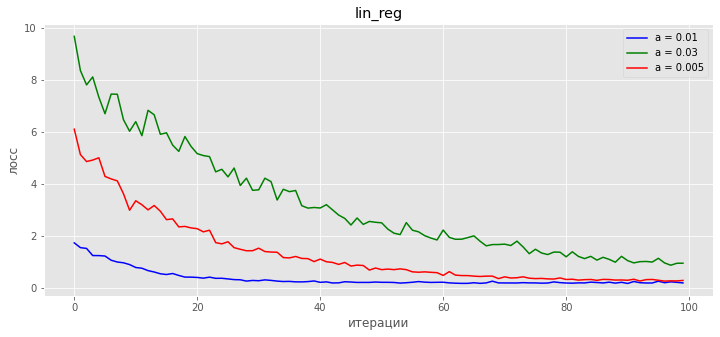

In [13]:
X_train = X[:1000:,::]
y_train = y[:1000:]
clf1 = MySGDClassifier(batch_generator = batch_generator,batch_size =100, C = 1, 
                         alpha = 0.01,
                         max_epoch = 10, model_type = 'lin_reg')
clf1.fit(X_train, y_train)
clf2 = MySGDClassifier(batch_generator = batch_generator,batch_size = 100, C = 1, 
                         alpha = 0.003,
                         max_epoch = 10, model_type = 'lin_reg')
clf2.fit(X_train, y_train)
clf3 = MySGDClassifier(batch_generator = batch_generator,batch_size = 100, C = 1, 
                         alpha = 0.005,
                         max_epoch = 10, model_type = 'lin_reg')
clf3.fit(X_train, y_train)
x = np.arange(len(clf1.errors_log['loss']))
fig, ax = plt.subplots()
ax.plot(x, clf1.errors_log['loss'],color='b', label='a = 0.01')
ax.plot(x, clf2.errors_log['loss'], color='g',label='a = 0.03')
ax.plot(x, clf3.errors_log['loss'], color='r',label='a = 0.005')
ax.set_xlabel("итерации")
ax.set_ylabel("лосс")
ax.set_title("lin_reg")
ax.legend(loc = 0)

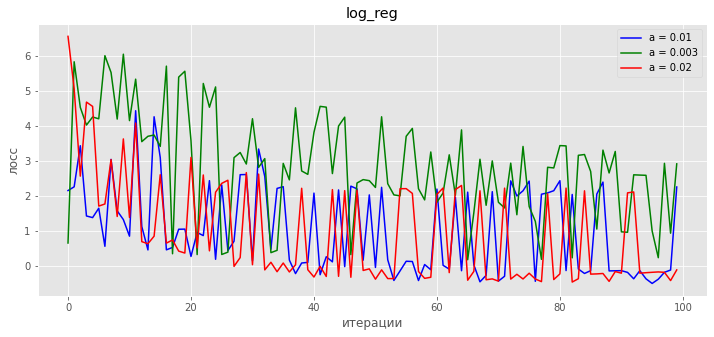

In [14]:
X_train = X[:10:,::]
y_train = y[:10:]
clf1 = MySGDClassifier(batch_generator = batch_generator,batch_size = 1, C = 1, 
                         alpha = 0.01,
                         max_epoch = 10, model_type = 'log_reg')
clf1.fit(X_train, y_train)
clf2 = MySGDClassifier(batch_generator = batch_generator,batch_size = 1, C = 1, 
                         alpha = 0.003,
                         max_epoch = 10, model_type = 'log_reg')
clf2.fit(X_train, y_train)
clf3 = MySGDClassifier(batch_generator = batch_generator,batch_size = 1, C = 1, 
                         alpha = 0.02,
                         max_epoch = 10, model_type = 'log_reg')
clf3.fit(X_train, y_train)
x = np.arange(len(clf1.errors_log['loss']))
fig, ax = plt.subplots()
ax.plot(x, clf1.errors_log['loss'],color='b', label='a = 0.01')
ax.plot(x, clf2.errors_log['loss'], color='g',label='a = 0.003')
ax.plot(x, clf3.errors_log['loss'], color='r',label='a = 0.02')
ax.set_xlabel("итерации")
ax.set_ylabel("лосс")
ax.set_title("log_reg")
ax.legend(loc = 0)

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

In [15]:
## Your Code Here

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

# Боевое применение (4  балла)

**Защита данной части возможна только при преодолении в проекте бейзлайна Handmade baseline.**

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [16]:
doc_to_title = {}
with open('docs_titles.tsv') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))


28026


In [17]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [18]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [30]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [31]:
from sklearn.model_selection import cross_val_score
scaler = StandardScaler()
scaler.fit(X_train)
scaler.transform(X_train)
clf = MySGDClassifier(batch_generator = batch_generator,batch_size = 100, C = 10, 
                         alpha = 0.005,
                         max_epoch = 20, model_type = 'lin_reg')
clf.fit(X_train, y_train)

MySGDClassifier(C=10, alpha=0.005,
                batch_generator=<function batch_generator at 0x7fb2dc692b90>,
                batch_size=100, max_epoch=20)

In [27]:
ans = -1
ansscore = 0
for x in range (0, 5):
    clf = MySGDClassifier(batch_generator = batch_generator,batch_size = 100, C = 100, 
                            alpha = 0.006,
                            max_epoch = 120, model_type = 'log_reg', lower = 0.45)
    scores = cross_val_score(clf, X_train, y_train, cv = 3)
    if scores.mean() > ansscore:
        ans = x
        ansscore = scores.mean()
ans, ansscore
#C = 7, alpha = 0.004, max_epoch = 90, lower = 0.5
#logreg: C = 100, lower = 0.45, alpha = 0.006,epoch = 120

(3, 0.790420336849789)

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

In [32]:
test_data = pd.read_csv('test_groups.csv')
X_train.shape, y_train.shape,train_data.shape, test_data.shape

((11690, 15), (11690,), (11690, 4), (16627, 3))

In [33]:
traingroups_titledata = {}
for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    #target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title,))

In [34]:
X_test = []
groups_test = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title) in enumerate(docs):
        groups_test.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist, reverse=True)[0:15]    )
X_test = np.array(X_test)
groups_test = np.array(groups_test)
print (X_test.shape, groups_test.shape)

(16627, 15) (16627,)


In [36]:
#C = 7, alpha = 0.00151, max_epoch = 90, lower = 0.5
#logreg: C = 100, lower = 0.45, alpha = 0.006,epoch = 120
clf = MySGDClassifier(batch_generator = batch_generator,batch_size = 100, C = 100, 
                            alpha = 0.006,
                            max_epoch = 120, model_type = 'log_reg', lower = 0.45)
scaler.fit_transform(X_train)
clf.fit(X_train, y_train)
scaler.transform(X_test)
pred = clf.predict(X_test)
scores = cross_val_score(clf, X_train, y_train, cv = 3)
scores.mean()

0.7889660073026917

In [37]:
ans1 = np.array(test_data['pair_id']).reshape(-1,1)
ans = np.append(ans1, pred.reshape(-1,1), axis = 1)
title = ['pair_id', 'target']
df = pd.DataFrame(ans, columns = title)
df.to_csv("submission.csv", index=False)


С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук показать Ваш ник на kaggle, под которым Вы залили решение, которое побило Handmade baseline. **

In [38]:
ilya mass (v nebe lunka)

SyntaxError: invalid syntax (<ipython-input-38-b5ef171db6cb>, line 1)

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***